# 1. Import Library

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy.stats import uniform

import datetime
import yfinance as yf
from pandas_datareader import data as pdr

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [167]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.backend import clear_session

# 2. Data

## 2.1 import raw data

In [211]:
# import raw data from yahoo finance

start_sp = datetime.datetime(1980, 1, 1)
end_sp = datetime.datetime(2019, 2, 28)

yf.pdr_override()
sp500 = pdr.get_data_yahoo('^GSPC', start_sp, end_sp)
sp500.shape

[*********************100%***********************]  1 of 1 completed


(9874, 6)

## 2.2 create new feature base on close price on different periods

In [212]:
# create new feature based on price
sp500['Log_ret_1d'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

# logarithmic return on different periods, +23 columns
sp500['Log_ret_1w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=5).sum()
sp500['Log_ret_2w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=10).sum()
sp500['Log_ret_3w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=15).sum()
sp500['Log_ret_4w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=20).sum()
sp500['Log_ret_8w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=40).sum()
sp500['Log_ret_12w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=60).sum()
sp500['Log_ret_16w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=80).sum()
sp500['Log_ret_20w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=100).sum()
sp500['Log_ret_24w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=120).sum()
sp500['Log_ret_28w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=140).sum()
sp500['Log_ret_32w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=160).sum()
sp500['Log_ret_36w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=180).sum()
sp500['Log_ret_40w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=200).sum()
sp500['Log_ret_44w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=220).sum()
sp500['Log_ret_48w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=240).sum()
sp500['Log_ret_52w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=260).sum()
sp500['Log_ret_56w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=280).sum()
sp500['Log_ret_60w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=300).sum()
sp500['Log_ret_64w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=320).sum()
sp500['Log_ret_68w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=340).sum()
sp500['Log_ret_72w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=360).sum()
sp500['Log_ret_76w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=380).sum()
sp500['Log_ret_80w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=400).sum()

sp500.shape

(9874, 30)

In [213]:
# volatility, +23 col 
sp500['Vol_1w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=5).std()*np.sqrt(5)
sp500['Vol_2w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=10).std()*np.sqrt(10)
sp500['Vol_3w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=15).std()*np.sqrt(15)
sp500['Vol_4w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=20).std()*np.sqrt(20)
sp500['Vol_8w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=40).std()*np.sqrt(40)
sp500['Vol_12w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=60).std()*np.sqrt(60)
sp500['Vol_16w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=80).std()*np.sqrt(80)
sp500['Vol_20w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=100).std()*np.sqrt(100)
sp500['Vol_24w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=120).std()*np.sqrt(120)
sp500['Vol_28w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=140).std()*np.sqrt(140)
sp500['Vol_32w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=160).std()*np.sqrt(160)
sp500['Vol_36w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=180).std()*np.sqrt(180)
sp500['Vol_40w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=200).std()*np.sqrt(200)
sp500['Vol_44w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=220).std()*np.sqrt(220)
sp500['Vol_48w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=240).std()*np.sqrt(240)
sp500['Vol_52w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=260).std()*np.sqrt(260)
sp500['Vol_56w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=280).std()*np.sqrt(280)
sp500['Vol_60w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=300).std()*np.sqrt(300)
sp500['Vol_64w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=320).std()*np.sqrt(320)
sp500['Vol_68w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=340).std()*np.sqrt(340)
sp500['Vol_72w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=360).std()*np.sqrt(360)
sp500['Vol_76w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=380).std()*np.sqrt(380)
sp500['Vol_80w'] = pd.Series(sp500['Log_ret_1d']).rolling(window=400).std()*np.sqrt(400)

sp500.shape

(9874, 53)

In [214]:
# Volumns mean, +23 col
sp500['Volume_1w'] = pd.Series(sp500['Volume']).rolling(window=5).mean()
sp500['Volume_2w'] = pd.Series(sp500['Volume']).rolling(window=10).mean()
sp500['Volume_3w'] = pd.Series(sp500['Volume']).rolling(window=15).mean()
sp500['Volume_4w'] = pd.Series(sp500['Volume']).rolling(window=20).mean()
sp500['Volume_8w'] = pd.Series(sp500['Volume']).rolling(window=40).mean()
sp500['Volume_12w'] = pd.Series(sp500['Volume']).rolling(window=60).mean()
sp500['Volume_16w'] = pd.Series(sp500['Volume']).rolling(window=80).mean()
sp500['Volume_20w'] = pd.Series(sp500['Volume']).rolling(window=100).mean()
sp500['Volume_24w'] = pd.Series(sp500['Volume']).rolling(window=120).mean()
sp500['Volume_28w'] = pd.Series(sp500['Volume']).rolling(window=140).mean()
sp500['Volume_32w'] = pd.Series(sp500['Volume']).rolling(window=160).mean()
sp500['Volume_36w'] = pd.Series(sp500['Volume']).rolling(window=180).mean()
sp500['Volume_40w'] = pd.Series(sp500['Volume']).rolling(window=200).mean()
sp500['Volume_44w'] = pd.Series(sp500['Volume']).rolling(window=220).mean()
sp500['Volume_48w'] = pd.Series(sp500['Volume']).rolling(window=240).mean()
sp500['Volume_52w'] = pd.Series(sp500['Volume']).rolling(window=260).mean()
sp500['Volume_56w'] = pd.Series(sp500['Volume']).rolling(window=280).mean()
sp500['Volume_60w'] = pd.Series(sp500['Volume']).rolling(window=300).mean()
sp500['Volume_64w'] = pd.Series(sp500['Volume']).rolling(window=320).mean()
sp500['Volume_68w'] = pd.Series(sp500['Volume']).rolling(window=340).mean()
sp500['Volume_72w'] = pd.Series(sp500['Volume']).rolling(window=360).mean()
sp500['Volume_76w'] = pd.Series(sp500['Volume']).rolling(window=380).mean()
sp500['Volume_80w'] = pd.Series(sp500['Volume']).rolling(window=400).mean()

sp500.shape

(9874, 76)

In [215]:
# 1 month (21 day) return, up/down 
sp500['Return_label'] = pd.Series(sp500['Log_ret_1d']).shift(-21).rolling(window=21).sum()
sp500['Label'] = np.where(sp500['Return_label']>0, 1, 0)

In [216]:
sp500 = sp500.dropna('index')
sp500 = sp500.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', "Return_label"], axis=1)

## 2.3 data infotmation

In [217]:
# show basic information

# 1. row and columns 
print('rows, columns:', sp500.shape)
print('\n')

# 2. describe dataframe columns
print('Columns:', sp500.columns, '\n')

# 3. show info on dataframe
print('Info: ', sp500.info(), '\n')

# 4. count Non-Nan 
print('Non-NA:', sp500.count(), '\n')

# 5. show head and tail
print('Head:', sp500.head(), '\n')
print('Tail:', sp500.tail(), '\n')

# 6. summary
print('Summary Statistics:', sp500.describe(), '\n')

rows, columns: (9453, 71)


Columns: Index(['Log_ret_1d', 'Log_ret_1w', 'Log_ret_2w', 'Log_ret_3w', 'Log_ret_4w',
       'Log_ret_8w', 'Log_ret_12w', 'Log_ret_16w', 'Log_ret_20w',
       'Log_ret_24w', 'Log_ret_28w', 'Log_ret_32w', 'Log_ret_36w',
       'Log_ret_40w', 'Log_ret_44w', 'Log_ret_48w', 'Log_ret_52w',
       'Log_ret_56w', 'Log_ret_60w', 'Log_ret_64w', 'Log_ret_68w',
       'Log_ret_72w', 'Log_ret_76w', 'Log_ret_80w', 'Vol_1w', 'Vol_2w',
       'Vol_3w', 'Vol_4w', 'Vol_8w', 'Vol_12w', 'Vol_16w', 'Vol_20w',
       'Vol_24w', 'Vol_28w', 'Vol_32w', 'Vol_36w', 'Vol_40w', 'Vol_44w',
       'Vol_48w', 'Vol_52w', 'Vol_56w', 'Vol_60w', 'Vol_64w', 'Vol_68w',
       'Vol_72w', 'Vol_76w', 'Vol_80w', 'Volume_1w', 'Volume_2w', 'Volume_3w',
       'Volume_4w', 'Volume_8w', 'Volume_12w', 'Volume_16w', 'Volume_20w',
       'Volume_24w', 'Volume_28w', 'Volume_32w', 'Volume_36w', 'Volume_40w',
       'Volume_44w', 'Volume_48w', 'Volume_52w', 'Volume_56w', 'Volume_60w',
       'Volume_64w', 'V

[8 rows x 71 columns] 



## 2.4 plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88540f1b00>,
      dtype=object)

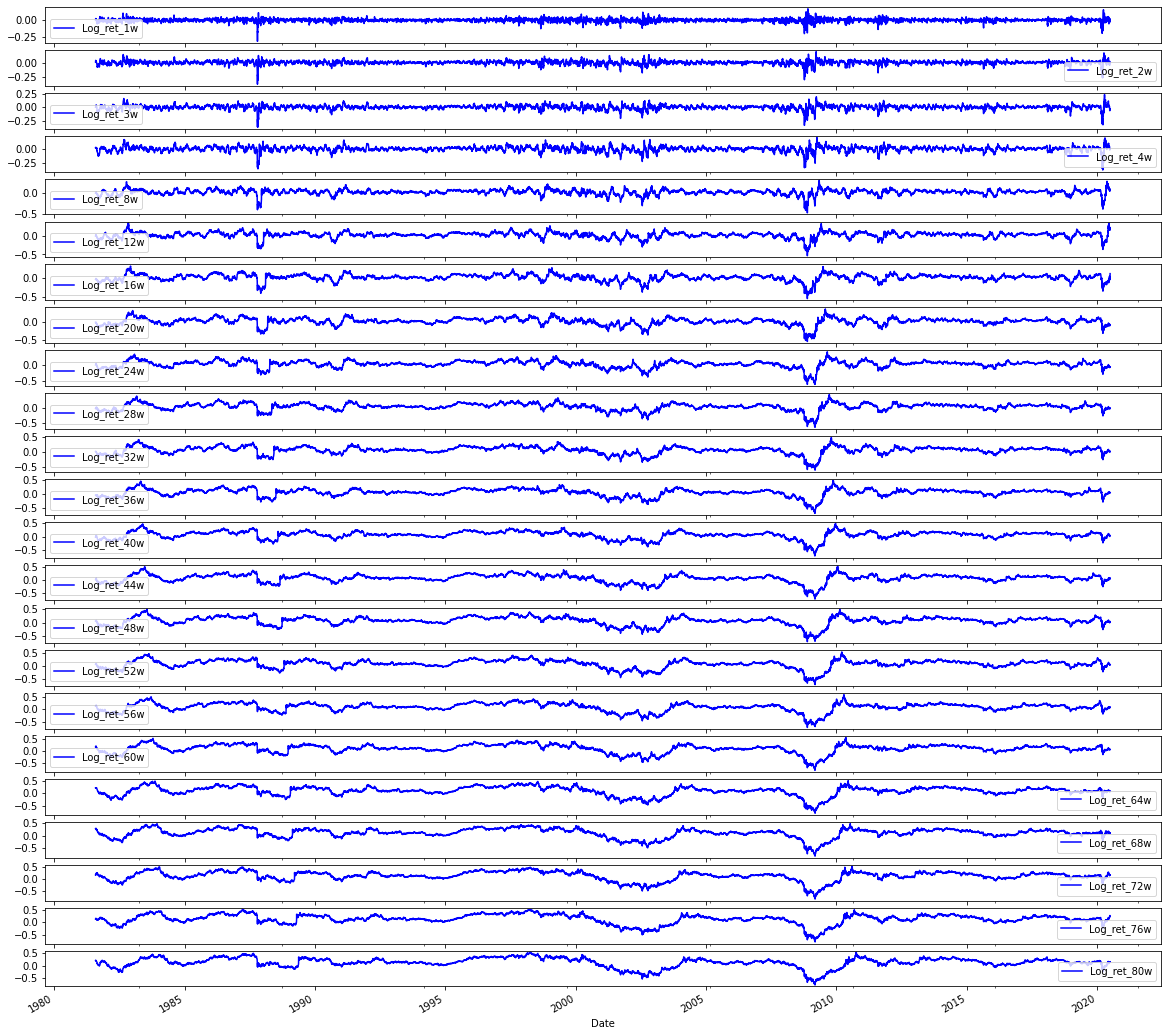

In [52]:
# log return
sp500.iloc[:, 1:24].plot(subplots=True, color='blue', figsize=(20, 20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88577a4eb8>,
      dtype=object)

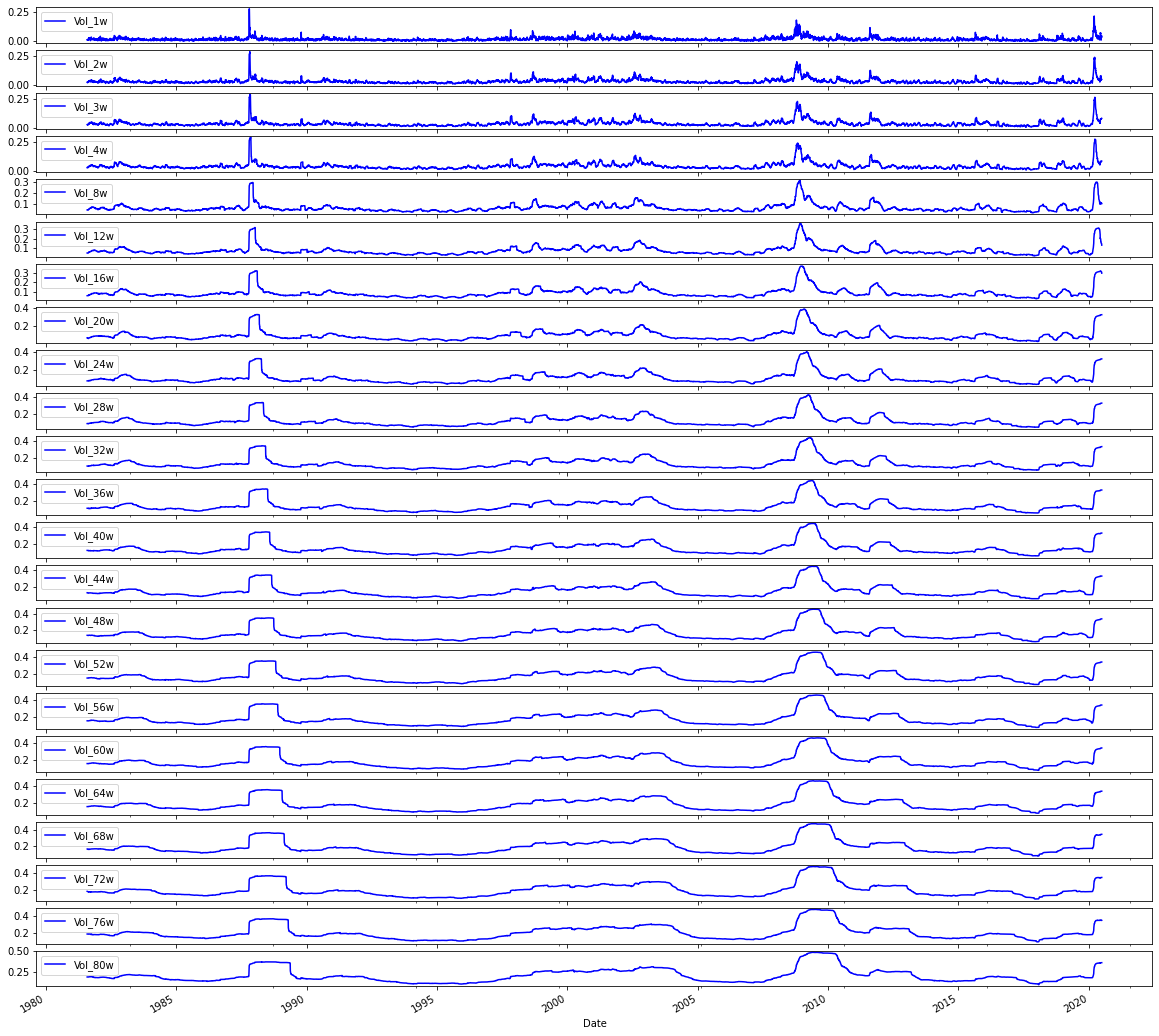

In [54]:
# volatility
sp500.iloc[:, 24:47].plot(subplots=True, color='blue', figsize=(20, 20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88392ac278>,
      dtype=object)

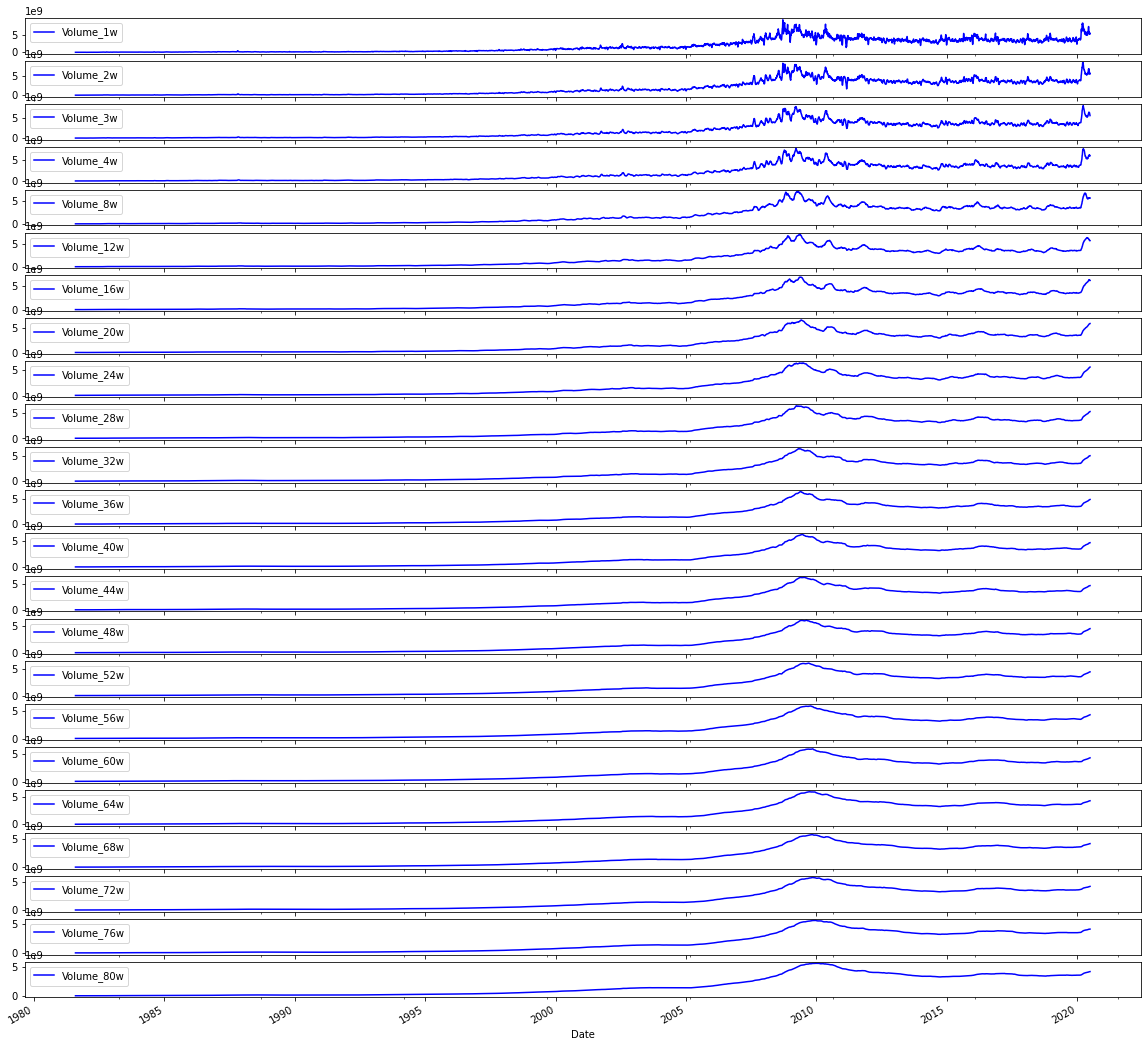

In [55]:
# volumes
sp500.iloc[:, 47:70].plot(subplots=True, color='blue', figsize=(20, 20))

Text(0.5, 0.98, 'Volatility vs. Volume')

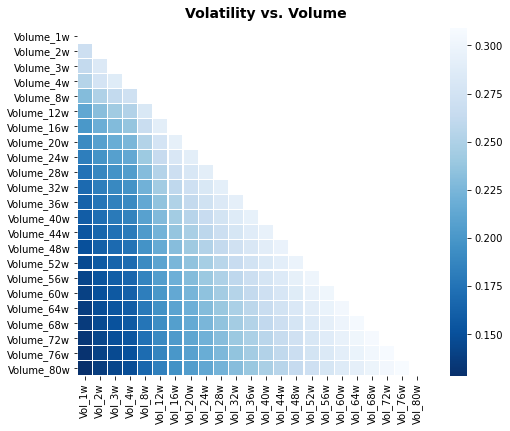

In [64]:
# correlation matrix

cols_name = sp500.iloc[:, 24:47].columns

corr = sp500.iloc[:, 24:70].corr().filter(cols_name).drop(cols_name)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heat_fig, ax = plt.subplots(1, 1, figsize=(9, 6))
heat = sns.heatmap(corr, ax=ax, mask=mask, square=True, linewidths=0.2, cmap='Blues_r')

heat_fig.subplots_adjust(top=.93)

heat_fig.suptitle('Volatility vs. Volume', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Volatility vs. Return')

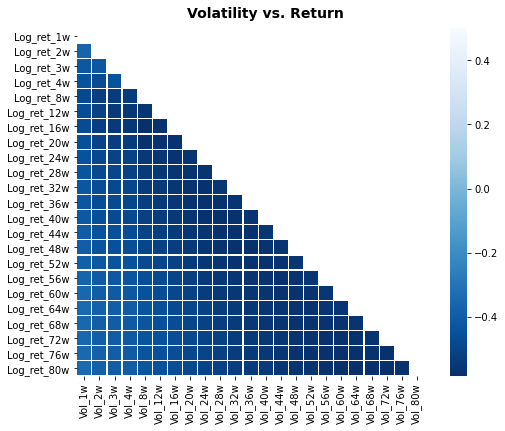

In [74]:
# volatility vs return

cols_name = sp500.columns[24:47]

corr = sp500.iloc[:, 1:47].corr().filter(cols_name).drop(cols_name)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heat_fig, (ax) = plt.subplots(1, 1, figsize=(9, 6))
heat = sns.heatmap(corr, ax=ax, mask=mask, vmax=0.5, square=True, linewidths=0.2, cmap='Blues_r')

heat_fig.subplots_adjust(top=0.93)
heat_fig.suptitle('Volatility vs. Return', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Volatility vs. Return')

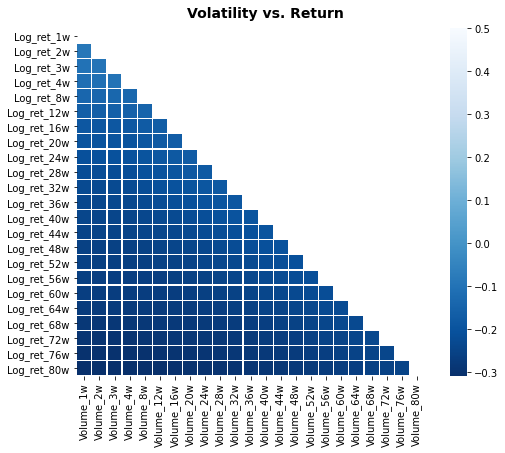

In [79]:
cols_name = sp500.columns[47:70]

corr = sp500.iloc[:, np.r_[1:24, 47:70]].corr().filter(cols_name).drop(cols_name)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heat_fig, (ax) = plt.subplots(1, 1, figsize=(9, 6))
heat = sns.heatmap(corr, ax=ax, mask=mask, vmax=0.5, square=True, linewidths=0.2, cmap='Blues_r')

heat_fig.subplots_adjust(top=0.93)
heat_fig.suptitle('Volatility vs. Return', fontsize=14, fontweight='bold')

# 3. Split Dataset

1. based on the datatset we have, we could try several experiments by using different columns
2. plans: 

    * Model 1: Volatility only
    * Model 2: Return only
    * Model 3: Volume only
    * Model 4: Volatility and return
    * Model 5: Volatility and Volumes
    * Model 6: Return and Volumes
    * Model 7: Volatility, return, and Volumes

In [218]:
# Model 1:

# for baseline model 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(sp500.iloc[:, 24:47], 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_1_lstm = X_train_1.values.reshape(X_train_1.shape[0], 1, X_train_1.shape[1])
X_test_1_lstm = X_test_1.values.reshape(X_test_1.shape[0], 1, X_test_1.shape[1])

In [219]:
# Model 2:

# for baseline model 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(sp500.iloc[:, 1:24], 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_2_lstm = X_train_2.values.reshape(X_train_2.shape[0], 1, X_train_2.shape[1])
X_test_2_lstm = X_test_2.values.reshape(X_test_2.shape[0], 1, X_test_2.shape[1])

In [220]:
# Model 3:

# for baseline model 
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(sp500.iloc[:, 47:70], 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_3_lstm = X_train_3.values.reshape(X_train_3.shape[0], 1, X_train_3.shape[1])
X_test_3_lstm = X_test_3.values.reshape(X_test_3.shape[0], 1, X_test_3.shape[1])

In [221]:
# Model 4:

# for baseline model 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(sp500.iloc[:, 1:47], 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_4_lstm = X_train_4.values.reshape(X_train_4.shape[0], 1, X_train_4.shape[1])
X_test_4_lstm = X_test_4.values.reshape(X_test_4.shape[0], 1, X_test_4.shape[1])

In [222]:
# Model 5:

# for baseline model 
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(sp500.iloc[:, 24:70], 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_5_lstm = X_train_5.values.reshape(X_train_5.shape[0], 1, X_train_5.shape[1])
X_test_5_lstm = X_test_5.values.reshape(X_test_5.shape[0], 1, X_test_5.shape[1])

In [273]:
# Model 6:

# for baseline model 
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(pd.concat([sp500.iloc[:, 1:24], sp500.iloc[:, 47:70]], axis=1), 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_6_lstm = X_train_6.values.reshape(X_train_6.shape[0], 1, X_train_6.shape[1])
X_test_6_lstm = X_test_6.values.reshape(X_test_6.shape[0], 1, X_test_6.shape[1])

In [224]:
# Model 7:

# for baseline model 
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(sp500.iloc[:, 1:70], 
                                                            sp500.iloc[:, 70], 
                                                            test_size=0.1,
                                                            shuffle=False,
                                                            stratify=None)


# for lstm, reshape to (samples or batch, time_steps or look_back, num_features)
X_train_7_lstm = X_train_7.values.reshape(X_train_7.shape[0], 1, X_train_7.shape[1])
X_test_7_lstm = X_test_7.values.reshape(X_test_7.shape[0], 1, X_test_7.shape[1])

In [225]:
print("train set increase bias:", np.mean(y_train_7))
print("test set increase bias:", np.mean(y_test_7))

train set increase bias: 0.6244269425179264
test set increase bias: 0.6437632135306554


# 4. Data preprocessing and walk forward cross-validation 
1. Time Series cross-validator provides train/dev indices to split time series data samples that are observed at fixed time intervals, in train/dev sets. In each split, dev indices must be higher than before, and thus shuffling in cross validator is inappropriate. The following graph illustrates how the time series split works:
2. Using Pipeline to standardization and normalization dataset
3. regularization, L1, L2, elastic Net


In [226]:
# time series split

dev_size = 0.1
n_splits = int((1 // dev_size) - 1)
tscv = TimeSeriesSplit(n_splits=n_splits)

In [227]:
# construct preprocessing and traditional ML model pipeline

steps_b = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('logistic', linear_model.SGDClassifier(loss='log', 
                                                   shuffle=False, 
                                                   early_stopping=False,
                                                   tol=1e-3,
                                                   random_state=42))]

pipeline_b = Pipeline(steps_b)

# regularization
penalty_b = ['l1', 'l2', 'elasticnet']

# evaluation metrics
scoring_b = {'AUC': 'roc_auc',
             'accuracy': make_scorer(accuracy_score)}
metric_b = 'accuracy'

In [228]:
# lstm configuration

# dataset shape [X, 1, Z] -> (samples, time steps, number of features)

num_samples = 1
look_back = 1

scoring_lstm = 'accuracy'

In [229]:
# define lstm model
def create_shallow_lstm(epochs=1, LSTM_units=1, num_samples=1, look_back=1,
                        num_features=None, dropout_rate=0, recurrent_dropout=0, verbose=0):
    model = Sequential()
    
    model.add(LSTM(units=LSTM_units, 
                   batch_input_shape=(num_samples, look_back, num_features),
                   stateful=True,
                   recurrent_dropout=recurrent_dropout))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.he_normal(seed=1)))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [230]:
# define plot function
def plot_roc(y_test, y_pred):
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='AUC='+str(auc))
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC-Curve')
    plt.show()

In [231]:
def plot_confusion_matrix(y_test, y_pred):
    confu_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(confu_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predict Label')
    ax.xaxis.set_ticklabels(['Down', 'Up'])
    ax.yaxis.set_ticklabels(['Down', 'Up'])
    
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Precision:', metrics.precision_score(y_test,y_pred))
    print('Recall:', metrics.recall_score(y_test, y_pred))

In [232]:
# Define a callback class
# Resets the states after each epoch (after going through a full time series)
class ModelStateReset(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        self.model.reset_states()
reset=ModelStateReset()

# 5. Models 

## 5.1 volatility
## * model 1-baseline

Loss function: log
accuracy: 0.5448412698412699 

Best Hyperparameters:
Number of iterations: 8
Penalty: l2
Alpha: 0.0014
l1_ratio: 0
Total number of features: 23
Number of selected features: 23


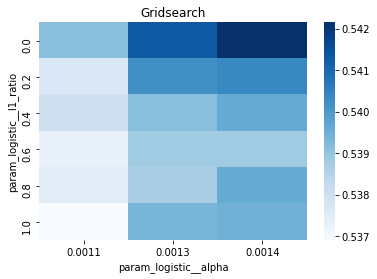

In [233]:
# define parameters

# iterations
iterations_1_b = [8]

# regularization
alpha_g_1_b = [0.0011, 0.0013, 0.0014]
l1_ratio_g_1_b = [0, 0.2, 0.4, 0.6, 0.8, 1]

hyperparameters_g_1_b = {'logistic__alpha': alpha_g_1_b,
                         'logistic__l1_ratio': l1_ratio_g_1_b,
                         'logistic__penalty': penalty_b,
                         'logistic__max_iter': iterations_1_b}

# create grid search
search_g_1_b = GridSearchCV(estimator=pipeline_b,
                            param_grid=hyperparameters_g_1_b,
                            cv=tscv,
                            verbose=0,
                            n_jobs=-1,
                            scoring=scoring_b,
                            refit=metric_b,
                            return_train_score=False)


# start grid search
tuned_model_1_b = search_g_1_b.fit(X_train_1, y_train_1)

# print the results
print('Loss function:', tuned_model_1_b.best_estimator_.get_params()['logistic__loss'])

# accuracy
print('accuracy:', tuned_model_1_b.best_score_, '\n')

# best hyperparameters
print('Best Hyperparameters:')
print('Number of iterations:', tuned_model_1_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_1_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_1_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_1_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_1_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_1_b.best_estimator_.steps[1][1].coef_[0][:]))

plt.title('Gridsearch')
pvt_1_b=pd.pivot_table(pd.DataFrame(tuned_model_1_b.cv_results_), values='mean_test_accuracy', index='param_logistic__l1_ratio', columns='param_logistic__alpha')
ax_1_b=sns.heatmap(pvt_1_b, cmap="Blues")
plt.show()

Accuracy: 0.6501057082452432
Precision: 0.6565315315315315
Recall: 0.9573070607553367


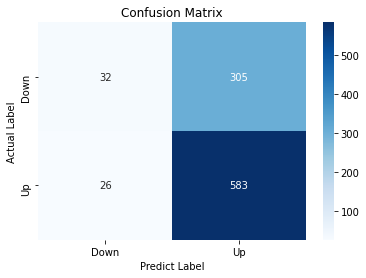

In [234]:
# confusion matrix
y_pred_1_b = tuned_model_1_b.predict(X_test_1)
plot_confusion_matrix(y_test_1, y_pred_1_b)

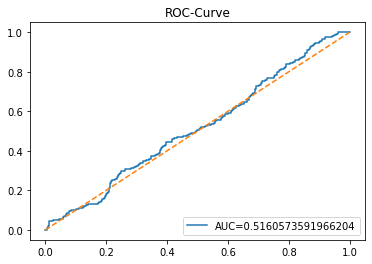

In [235]:
# roc curve

y_pred_prob_1_b = tuned_model_1_b.predict_proba(X_test_1)[:, 1]
plot_roc(y_test_1, y_pred_prob_1_b)

## * model 1-LSTM approach

In [236]:
# clear tensorflow graph
# clear_session()

start = time.time()

# define parameters: epochs, lstm_units, num_features
epochs = 1
LSTM_units_1_lstm = 195
num_features_1_lstm = X_train_1.shape[1]
dropout_rate = 0.1
recurrent_dropout = 0.1
verbose = 1

batch_size = [1]
hyperparameter_1_lstm = {'batch_size': batch_size}

clf_1_lstm = KerasClassifier(build_fn=create_shallow_lstm,
                             epochs=epochs,
                             num_samples=num_samples,
                             look_back=look_back,
                             num_features=num_features_1_lstm,
                             dropout_rate=dropout_rate,
                             recurrent_dropout=recurrent_dropout,
                             verbose=verbose)

# gridsearch
search_1_lstm = GridSearchCV(estimator=clf_1_lstm, 
                             param_grid=hyperparameter_1_lstm,
                             n_jobs=1,
                             cv=tscv,
                             scoring=scoring_lstm,
                             refit=True,
                             return_train_score=False)

# fit
tuned_model_1_lstm = search_1_lstm.fit(X_train_1_lstm, y_train_1, shuffle=False, callbacks=[reset])

print('accuracy:', tuned_model_1_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_1_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_1_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_1_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_1_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 947 samples
945/945 [==============================] - 1s 1ms/sample
Train on 1892 samples
945/945 [==============================] - 1s 1ms/sample
Train on 2837 samples
945/945 [==============================] - 1s 1ms/sample
Train on 3782 samples
945/945 [==============================] - 1s 1ms/sample
Train on 4727 samples
945/945 [==============================] - 1s 1ms/sample
Train on 5672 samples
945/945 [==============================] - 1s 1ms/sample
Train on 6617 samples
945/945 [==============================] - 1s 1ms/sample
Train on 7562 samples
945/945 [==============================] - 1s 1ms/sample
Train on 8507 samples
8507/8507 [==============================] - 16s 2ms/sample - loss: 0.6667 - acc: 0.6218
accuracy: 0.6308201058201058
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.1
recurrent_dropout: 0.1
running time: 128.04s


946/946 [==============================] - 1s 1ms/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


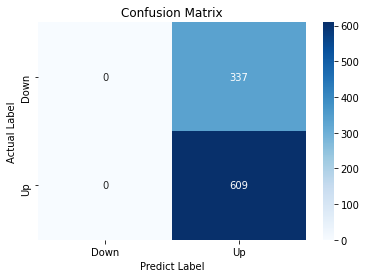

946/946 [==============================] - 1s 684us/sample


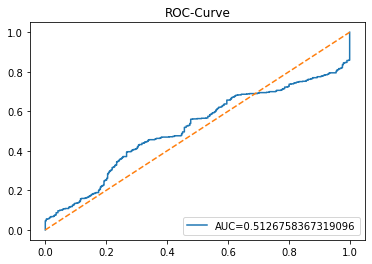

In [237]:
# confusion matrix

y_pred_1_lstm = tuned_model_1_lstm.predict(X_test_1_lstm)
plot_confusion_matrix(y_test_1, y_pred_1_lstm)
plt.show()

# plot roc curve
y_pred_prob_1_lstm = tuned_model_1_lstm.predict_proba(X_test_1_lstm)[:, 1]
plot_roc(y_test_1, y_pred_prob_1_lstm)
plt.show()

## 5.2 Return
## model-2-Baseline

In [238]:
iterations_2_b = [8]

# regularization
alpha_g_2_b = [0.0011, 0.0012, 0.0013]
l1_ratio_g_2_b = [0, 0.2, 0.4, 0.6, 0.8, 1]

# hyperparameter options
hyperparameters_g_2_b={'logistic__alpha':alpha_g_2_b, 
                       'logistic__l1_ratio':l1_ratio_g_2_b, 
                       'logistic__penalty':penalty_b,  
                       'logistic__max_iter':iterations_2_b}

search_g_2_b = GridSearchCV(estimator=pipeline_b,
                            param_grid=hyperparameters_g_2_b,
                            cv=tscv,
                            verbose=1,
                            n_jobs=-1,
                            scoring=scoring_b,
                            refit=metric_b,
                            return_train_score=False)

tuned_model_2_b = search_g_2_b.fit(X_train_2, y_train_2)

# show results
print('Loss function:', tuned_model_2_b.best_estimator_.get_params()['logistic__loss'])

# accuracy
print('accuracy:', tuned_model_2_b.best_score_, '\n')

# best hyperparameters
print('Best Hyperparameters:')
print('Number of iterations:', tuned_model_2_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_2_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_2_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_2_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_2_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_2_b.best_estimator_.steps[1][1].coef_[0][:]))


Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 409 out of 432 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    1.9s finished


Loss function: log
accuracy: 0.5538359788359788 

Best Hyperparameters:
Number of iterations: 8
Penalty: elasticnet
Alpha: 0.0012
l1_ratio: 0.4
Total number of features: 23
Number of selected features: 9


Accuracy: 0.6606765327695561
Precision: 0.6621621621621622
Recall: 0.9655172413793104


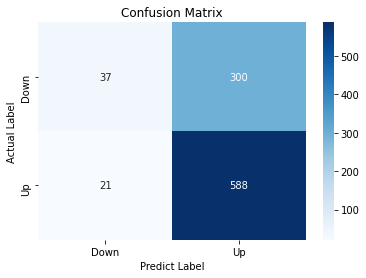

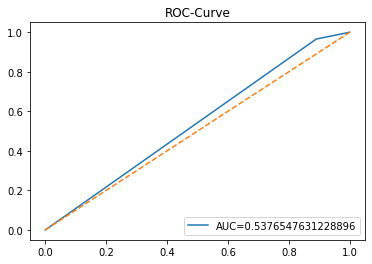

In [239]:
y_pred_2_b = tuned_model_2_b.predict(X_test_2)
plot_confusion_matrix(y_test_2, y_pred_2_b)
plt.show()

plot_roc(y_test_2, y_pred_2_b)
plt.show()

## model-2-lstm

In [241]:
# clear session
clear_session()

start = time.time()

epochs = 1
LSTM_units_2_lstm = 180
num_samples = 1
look_back = 1
num_features_2_lstm = X_train_2.shape[1]
dropout_rate = 0.0
recurrent_dropout = 0.4
verbose = 1

batch_size = [1]

hyperparameter_2_lstm = {'batch_size': batch_size}

clf_2_lstm = KerasClassifier(build_fn=create_shallow_lstm,
                             epochs=epochs,
                             LSTM_units = LSTM_units_2_lstm,
                             num_samples = num_samples,
                             look_back = look_back,
                             num_features = num_features_2_lstm,
                             dropout_rate = dropout_rate,
                             recurrent_dropout = recurrent_dropout,
                             verbose=verbose)

search_2_lstm = GridSearchCV(estimator=clf_2_lstm, 
                             param_grid=hyperparameter_2_lstm,
                             n_jobs=-1,
                             cv=tscv,
                             scoring=scoring_lstm,
                             refit=True,
                             return_train_score=False)

tuned_model_2_lstm = search_2_lstm.fit(X_train_2_lstm, y_train_2)

# print the results
print('accuracy:', tuned_model_2_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_2_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_2_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_2_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_2_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 8507 samples
8507/8507 [==============================] - 17s 2ms/sample - loss: 0.6640 - acc: 0.6208
accuracy: 0.6215608465608465
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.4
running time: 65.42s


946/946 [==============================] - 0s 474us/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


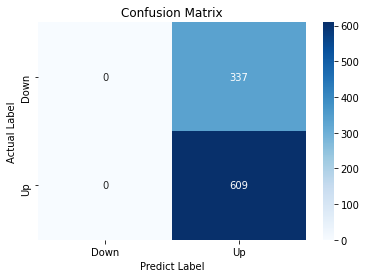

946/946 [==============================] - 0s 463us/sample


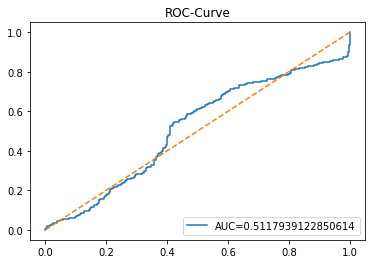

In [243]:
y_pred_2_lstm = tuned_model_2_lstm.predict(X_test_2_lstm)
plot_confusion_matrix(y_test_2, y_pred_2_lstm)
plt.show()

y_pred_prob_2_lstm = tuned_model_2_lstm.predict_proba(X_test_2_lstm)[:, 1]
plot_roc(y_test_2, y_pred_prob_2_lstm)

## 5.3 Volumes
## model-3-baseline

In [249]:
iterations_3_b = [20]

alpha_r_3_b = uniform(loc=0.00001, scale=0.0001)
l1_ratio_r_3_b = uniform(loc=0, scale=1)

hyperparameters_r_3_b = {'logistic__alpha': alpha_r_3_b,
                         'logistic__l1_ratio': l1_ratio_r_3_b,
                         'logistic__penalty': penalty_b,
                         'logistic__max_iter': iterations_3_b}

search_r_3_b = RandomizedSearchCV(pipeline_b, 
                                  hyperparameters_r_3_b, 
                                  n_iter=20, 
                                  random_state=42, 
                                  cv=tscv, 
                                  verbose=verbose,
                                  n_jobs=-1,
                                  scoring=scoring_b,
                                  refit=metric_b,
                                  return_train_score=False)

tuned_model_3_b = search_r_3_b.fit(X_train_3, y_train_3)


# print results
print('Loss function:', tuned_model_3_b.best_estimator_.get_params()['logistic__loss'])

# View Accuracy 
print('Accuracy: ', tuned_model_3_b.best_score_)

# View best hyperparameters
print("Best hyperparameters:")
print('Number of iterations:', tuned_model_3_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_3_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_3_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_3_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_3_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_3_b.best_estimator_.steps[1][1].coef_[0][:]))

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s


Loss function: log
Accuracy:  0.5564814814814815
Best hyperparameters:
Number of iterations: 20
Penalty: l2
Alpha: 2.733646535077721e-05
l1_ratio: 0.3910606075732408
Total number of features: 23
Number of selected features: 23


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.3s finished
/Users/zz/Documents/data/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Accuracy: 0.3763213530655391
Precision: 0.7317073170731707
Recall: 0.04926108374384237


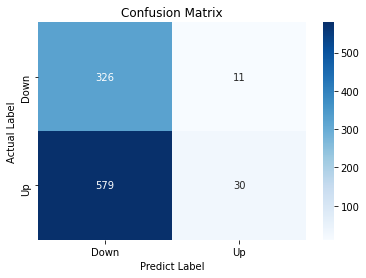

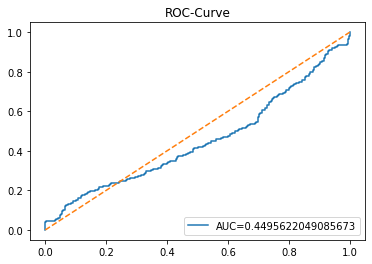

In [251]:
y_pred_3_b = tuned_model_3_b.predict(X_test_3)
plot_confusion_matrix(y_test_3, y_pred_3_b)
plt.show()

y_pred_prob_3_b = tuned_model_3_b.predict_proba(X_test_3)[:, 1]
plot_roc(y_test_3, y_pred_prob_3_b)
plt.show()

## model-3-lstm

In [254]:
start = time.time()

epochs = 1
LSTM_units_3_lstm = 180
num_samples = 1
look_back = 1
num_features_3_lstm = X_train_3.shape[1]
dropout_rate = 0.0
recurrent_dropout = 0.4
verbose = 1

batch_size = [1]
hyperparameters_3_lstm = {'batch_size': batch_size}

clf_3_lstm = KerasClassifier(build_fn=create_shallow_lstm,
                             epochs=epochs, 
                             LSTM_units=LSTM_units_3_lstm, 
                             num_samples=num_samples, 
                             look_back=look_back, 
                             num_features=num_features_3_lstm, 
                             dropout_rate=dropout_rate,
                             recurrent_dropout=recurrent_dropout,
                             verbose=verbose)

search_3_lstm = GridSearchCV(estimator=clf_3_lstm, 
                                   param_grid=hyperparameters_3_lstm,  
                                   n_jobs=-1,  
                                   cv=tscv, 
                                   scoring=scoring_lstm, # accuracy
                                   refit=True, 
                                   return_train_score=False)

tuned_model_3_lstm = search_3_lstm.fit(X_train_3_lstm, y_train_3)

# print results

print('accuracy:', tuned_model_3_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_3_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_3_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_3_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_3_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 8507 samples
8507/8507 [==============================] - 18s 2ms/sample - loss: 0.6638 - acc: 0.6220
accuracy: 0.6252645502645503
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.4
running time: 67.42s


946/946 [==============================] - 1s 580us/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


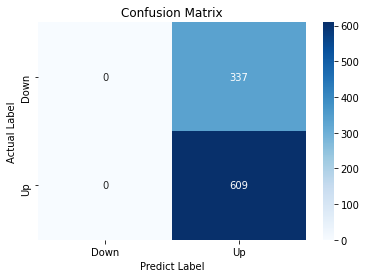

946/946 [==============================] - 0s 474us/sample


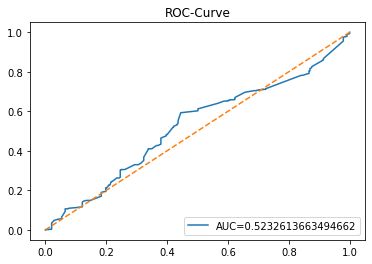

In [256]:
y_pred_3_lstm = tuned_model_3_lstm.predict(X_test_3_lstm)
plot_confusion_matrix(y_test_3, y_pred_3_lstm)
plt.show()

y_pred_prob_3_lstm = tuned_model_3_lstm.predict_proba(X_test_3_lstm)[:, 1]
plot_roc(y_test_3, y_pred_prob_3_lstm)
plt.show()

## 5.4 Volatility + return
## model-4-baseline

In [257]:
iterations_4_b = [8]

alpha_g_4_b = [0.0011, 0.0012, 0.0013]
l1_ratio_g_4_b = [0, 0.2, 0.4, 0.6, 0.8, 1]

hyperparameters_g_4_b={'logistic__alpha':alpha_g_4_b, 
                       'logistic__l1_ratio':l1_ratio_g_4_b, 
                       'logistic__penalty':penalty_b,  
                       'logistic__max_iter':iterations_4_b}

search_g_4_b = GridSearchCV(estimator=pipeline_b,
                            param_grid=hyperparameters_g_4_b,
                            cv=tscv,
                            verbose=verbose,
                            n_jobs=-1,
                            scoring=scoring_b,
                            refit=metric_b,
                            return_train_score=False)

tuned_model_4_b = search_g_4_b.fit(X_train_4, y_train_4)

# print results
print('Loss function:', tuned_model_4_b.best_estimator_.get_params()['logistic__loss'])

# View Accuracy 
print('Accuracy: ', tuned_model_4_b.best_score_)

# View best hyperparameters
print("Best hyperparameters:")
print('Number of iterations:', tuned_model_4_b.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model_4_b.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model_4_b.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model_4_b.best_estimator_.get_params()['logistic__l1_ratio'])

# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_4_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_4_b.best_estimator_.steps[1][1].coef_[0][:]))

Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 409 out of 432 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    4.0s finished


Loss function: log
Accuracy:  0.5178571428571429
Best hyperparameters:
Number of iterations: 8
Penalty: l1
Alpha: 0.0011
l1_ratio: 0
Total number of features: 46
Number of selected features: 14


Accuracy: 0.6120507399577167
Precision: 0.6520100502512562
Recall: 0.8522167487684729


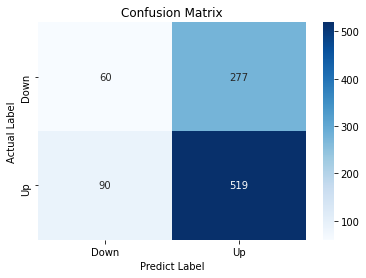

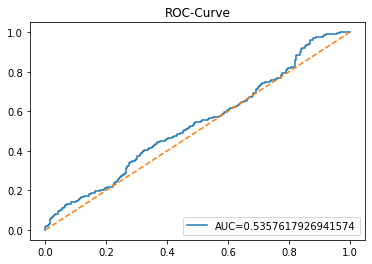

In [258]:
y_pred_4_b = tuned_model_4_b.predict(X_test_4)
plot_confusion_matrix(y_test_4, y_pred_4_b)
plt.show()

y_pred_prob_4_b = tuned_model_4_b.predict_proba(X_test_4)[:, 1]
plot_roc(y_test_4, y_pred_prob_4_b)
plt.show()

## model-4-lstm

In [259]:
start = time.time()

epochs = 1
LSTM_units_4_lstm = 200
num_samples = 1
look_back = 1
num_features_4_lstm = X_train_4.shape[1]
dropout_rate = 0.0
recurrent_dropout = 0.4
verbose = 1

batch_size = [1]
hyperparameter_4_lstm = {'batch_size': batch_size}

clf_4_lstm = KerasClassifier(build_fn=create_shallow_lstm,
                             epochs=epochs,
                             LSTM_units=LSTM_units_4_lstm,
                             num_samples=num_samples,
                             look_back=look_back, 
                             num_features=num_features_4_lstm, 
                             dropout_rate=dropout_rate,
                             recurrent_dropout=recurrent_dropout,
                             verbose=verbose)

search_4_lstm = GridSearchCV(estimator=clf_4_lstm, 
                             param_grid=hyperparameter_4_lstm,  
                             n_jobs=-1,  
                             cv=tscv, 
                             scoring=scoring_lstm, # accuracy
                             refit=True, 
                             return_train_score=False)

tuned_model_4_lstm = search_4_lstm.fit(X_train_4_lstm, y_train_4)

# print the results
print('accuracy:', tuned_model_4_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_4_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_4_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_4_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_4_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 8507 samples
8507/8507 [==============================] - 21s 2ms/sample - loss: 0.6638 - acc: 0.6236
accuracy: 0.6222222222222222
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.4
running time: 73.96s


946/946 [==============================] - 1s 655us/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


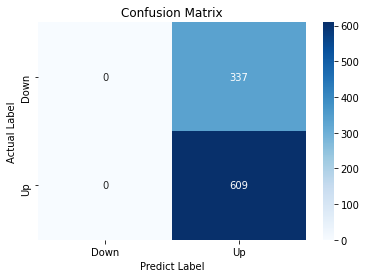

946/946 [==============================] - 0s 490us/sample


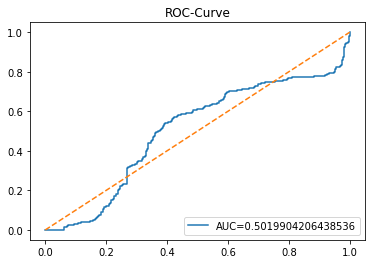

In [260]:
y_pred_4_lstm = tuned_model_4_lstm.predict(X_test_4_lstm)
plot_confusion_matrix(y_test_4, y_pred_4_lstm)
plt.show()

y_pred_prob_4_lstm = tuned_model_4_lstm.predict_proba(X_test_4_lstm)[:, 1]
plot_roc(y_test_4, y_pred_prob_4_lstm)
plt.show()

## 5.5 Volatility + volumes
## model-5-baseline

In [263]:
iterations_5_b = [10]

alpha_g_5_b = [0.0001, 0.0003, 0.0005]
l1_ratio_g_5_b = [0, 0.2, 0.4, 0.6, 0.8, 1]

hyperparameters_g_5_b={'logistic__alpha':alpha_g_5_b, 
                       'logistic__l1_ratio':l1_ratio_g_5_b, 
                       'logistic__penalty':penalty_b,  
                       'logistic__max_iter':iterations_5_b}

search_g_5_b=GridSearchCV(estimator=pipeline_b, 
                          param_grid=hyperparameters_g_5_b, 
                          cv=tscv, 
                          verbose=0, 
                          n_jobs=-1, 
                          scoring=scoring_b, 
                          refit=metric_b, 
                          return_train_score=False)

tuned_model_5_b=search_g_5_b.fit(X_train_5, y_train_5)


# print results
print('Loss function:', tuned_model_5_b.best_estimator_.get_params()['logistic__loss'])

# View Accuracy 
print('Accuracy: ', tuned_model_5_b.best_score_)

# View best hyperparameters
print("Best hyperparameters:")
print(tuned_model_5_b.best_estimator_)


# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_5_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_5_b.best_estimator_.steps[1][1].coef_[0][:]))

Loss function: log
Accuracy:  0.557936507936508
Best hyperparameters:
Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 SGDClassifier(alpha=0.0005, l1_ratio=0.6, loss='log',
                               max_iter=10, penalty='elasticnet',
                               random_state=42, shuffle=False))])
Total number of features: 46
Number of selected features: 15


Accuracy: 0.5909090909090909
Precision: 0.629976580796253
Recall: 0.8834154351395731


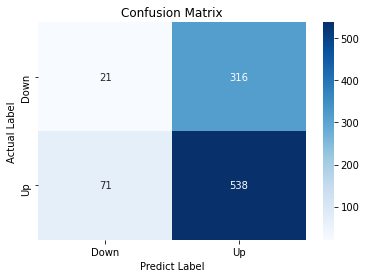

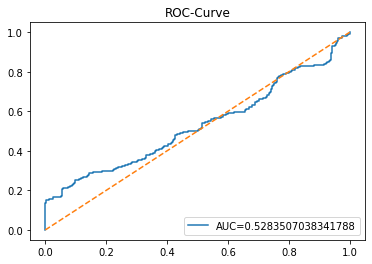

In [264]:
y_pred_5_b = tuned_model_5_b.predict(X_test_5)
plot_confusion_matrix(y_test_5, y_pred_5_b)
plt.show()

y_pred_prob_5_b = tuned_model_5_b.predict_proba(X_test_5)[:, 1]
plot_roc(y_test_5, y_pred_prob_5_b)
plt.show()

## model-5-lstm

In [270]:
clear_session()

start = time.time()

epochs = 1
LSTM_units_5_lstm = 190
num_samples = 1
look_back = 1
num_features_5_lstm = X_train_5.shape[1]
dropout_rate = 0.0
recurrent_dropout = 0.3
verbose = 1

batch_size=[1] 

# hyperparameter
hyperparameter_5_lstm={'batch_size':batch_size}

clf_5_lstm=KerasClassifier(build_fn=create_shallow_lstm, 
                           epochs=epochs, 
                           LSTM_units=LSTM_units_5_lstm, 
                           num_samples=num_samples, 
                           look_back=look_back, 
                           num_features=num_features_5_lstm, 
                           dropout_rate=dropout_rate,
                           recurrent_dropout=recurrent_dropout,
                           verbose=verbose)
# Gridsearch
search_5_lstm=GridSearchCV(estimator=clf_5_lstm, 
                           param_grid=hyperparameter_5_lstm,  
                           n_jobs=1,  
                           cv=tscv, 
                           scoring=scoring_lstm, # accuracy
                           refit=True, 
                           return_train_score=False)

# Fit model
tuned_model_5_lstm=search_5_lstm.fit(X_train_5_lstm, y_train_5, shuffle=False, callbacks=[reset])


# print the results
print('accuracy:', tuned_model_5_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_5_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_5_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_5_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_5_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 947 samples
945/945 [==============================] - 1s 562us/sample
Train on 1892 samples
945/945 [==============================] - 1s 594us/sample
Train on 2837 samples
945/945 [==============================] - 1s 629us/sample
Train on 3782 samples
945/945 [==============================] - 1s 636us/sample
Train on 4727 samples
945/945 [==============================] - 1s 653us/sample
Train on 5672 samples
945/945 [==============================] - 1s 684us/sample
Train on 6617 samples
945/945 [==============================] - 1s 718us/sample
Train on 7562 samples
945/945 [==============================] - 1s 752us/sample
Train on 8507 samples
8507/8507 [==============================] - 21s 3ms/sample - loss: 0.6789 - acc: 0.6040
accuracy: 0.5927248677248678
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.3
running time: 121.82s


946/946 [==============================] - 1s 857us/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


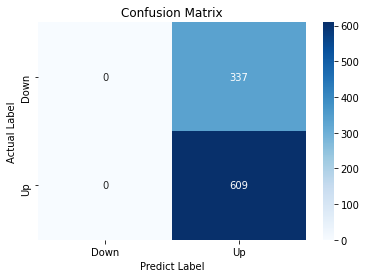

946/946 [==============================] - 1s 561us/sample


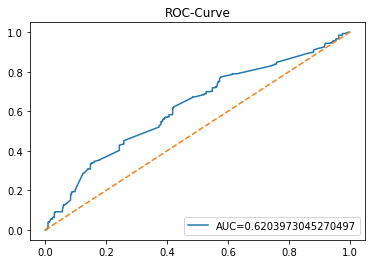

In [271]:
y_pred_5_lstm = tuned_model_5_lstm.predict(X_test_5_lstm)
plot_confusion_matrix(y_test_5, y_pred_5_lstm)
plt.show()

y_pred_prob_5_lstm = tuned_model_5_lstm.predict_proba(X_test_5_lstm)[:, 1]
plot_roc(y_test_5, y_pred_prob_5_lstm)
plt.show()

## 5.6 Volumes + return
## model-6-baseline

In [274]:
iterations_6_b = [8]

alpha_g_6_b=[0.0011, 0.0012, 0.0013]
l1_ratio_g_6_b=[0, 0.2, 0.4, 0.6, 0.8, 1] 

# Create hyperparameter options
hyperparameters_g_6_b={'logistic__alpha':alpha_g_6_b, 
                       'logistic__l1_ratio':l1_ratio_g_6_b, 
                       'logistic__penalty':penalty_b,  
                       'logistic__max_iter':iterations_6_b}

# Create grid search 
search_g_6_b=GridSearchCV(estimator=pipeline_b, 
                          param_grid=hyperparameters_g_6_b, 
                          cv=tscv, 
                          verbose=0, 
                          n_jobs=-1, 
                          scoring=scoring_b, 
                          refit=metric_b, 
                          return_train_score=False)

# Fit grid search
tuned_model_6_b=search_g_6_b.fit(X_train_6, y_train_6)

# print results
print('Loss function:', tuned_model_6_b.best_estimator_.get_params()['logistic__loss'])

# View Accuracy 
print('Accuracy: ', tuned_model_6_b.best_score_)

# View best hyperparameters
print("Best hyperparameters:")
print(tuned_model_6_b.best_estimator_)


# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_6_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_6_b.best_estimator_.steps[1][1].coef_[0][:]))

Loss function: log
Accuracy:  0.5373015873015873
Best hyperparameters:
Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 SGDClassifier(alpha=0.0013, l1_ratio=0, loss='log', max_iter=8,
                               penalty='l1', random_state=42, shuffle=False))])
Total number of features: 46
Number of selected features: 6


Accuracy: 0.653276955602537
Precision: 0.6545654565456546
Recall: 0.9770114942528736


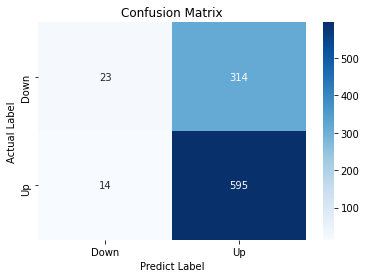

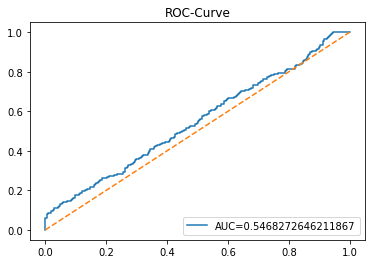

In [275]:
y_pred_6_b = tuned_model_6_b.predict(X_test_6)
plot_confusion_matrix(y_test_6, y_pred_6_b)
plt.show()

y_pred_prob_6_b = tuned_model_6_b.predict_proba(X_test_6)[:, 1]
plot_roc(y_test_6, y_pred_prob_6_b)
plt.show()

## model-6-lstm

In [278]:
clear_session()


start=time.time()


epochs=1
LSTM_units_6_lstm=400
num_samples=1 
look_back=1
num_features_6_lstm=X_train_6.shape[1]

dropout_rate=0.
recurrent_dropout=0.5
verbose=1

#hyperparameter
batch_size=[1] 

# hyperparameter
hyperparameter_6_lstm={'batch_size':batch_size}

clf_6_lstm=KerasClassifier(build_fn=create_shallow_lstm, 
                           epochs=epochs, 
                           LSTM_units=LSTM_units_6_lstm, 
                           num_samples=num_samples, 
                           look_back=look_back, 
                           num_features=num_features_6_lstm, 
                           dropout_rate=dropout_rate,
                           recurrent_dropout=recurrent_dropout,
                           verbose=verbose)
# Gridsearch
search_6_lstm=GridSearchCV(estimator=clf_6_lstm, 
                           param_grid=hyperparameter_6_lstm,  
                           n_jobs=1,  
                           cv=tscv, 
                           scoring=scoring_lstm, # accuracy
                           refit=True, 
                           return_train_score=False)

# Fit model
tuned_model_6_lstm=search_6_lstm.fit(X_train_6_lstm, y_train_6, shuffle=False, callbacks=[reset])


# print the results
print('accuracy:', tuned_model_6_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_6_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_6_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_6_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_6_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 947 samples
945/945 [==============================] - 1s 726us/sample
Train on 1892 samples
945/945 [==============================] - 1s 823us/sample
Train on 2837 samples
945/945 [==============================] - 1s 846us/sample
Train on 3782 samples
945/945 [==============================] - 1s 1ms/sample
Train on 4727 samples
945/945 [==============================] - 1s 964us/sample
Train on 5672 samples
945/945 [==============================] - 1s 942us/sample
Train on 6617 samples
945/945 [==============================] - 1s 1ms/sample
Train on 7562 samples
945/945 [==============================] - 1s 1ms/sample
Train on 8507 samples
8507/8507 [==============================] - 55s 6ms/sample - loss: 0.6929 - acc: 0.6182
accuracy: 0.5095238095238096
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.5
running time: 281.54s


946/946 [==============================] - 1s 1ms/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


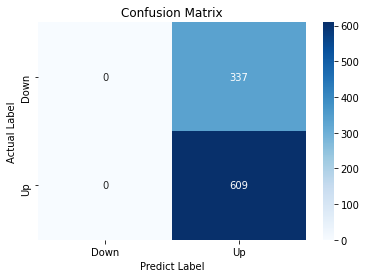

946/946 [==============================] - 1s 1ms/sample


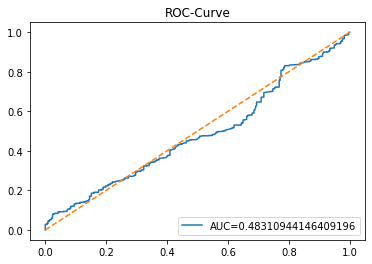

In [279]:
y_pred_6_lstm = tuned_model_6_lstm.predict(X_test_6_lstm)
plot_confusion_matrix(y_test_6, y_pred_6_lstm)
plt.show()

y_pred_prob_6_lstm = tuned_model_6_lstm.predict_proba(X_test_6_lstm)[:, 1]
plot_roc(y_test_6, y_pred_prob_6_lstm)
plt.show()

## 5.7 Volatility + return + volumes
## model-7-baseline

In [280]:
iterations_7_b = [10]

alpha_g_7_b=[0.0019, 0.002, 0.0021] 
l1_ratio_g_7_b=[0, 0.2, 0.4, 0.6, 0.8, 1] 

hyperparameters_g_7_b={'logistic__alpha':alpha_g_7_b, 
                       'logistic__l1_ratio':l1_ratio_g_7_b, 
                       'logistic__penalty':penalty_b,  
                       'logistic__max_iter':iterations_7_b}

search_g_7_b=GridSearchCV(estimator=pipeline_b, 
                          param_grid=hyperparameters_g_7_b, 
                          cv=tscv, 
                          verbose=0, 
                          n_jobs=-1, 
                          scoring=scoring_b, 
                          refit=metric_b, 
                          return_train_score=False)

tuned_model_7_b=search_g_7_b.fit(X_train_7, y_train_7)



# print results
print('Loss function:', tuned_model_7_b.best_estimator_.get_params()['logistic__loss'])

# View Accuracy 
print('Accuracy: ', tuned_model_7_b.best_score_)

# View best hyperparameters
print("Best hyperparameters:")
print(tuned_model_7_b.best_estimator_)


# Find the number of nonzero coefficients (selected features)
print("Total number of features:", len(tuned_model_7_b.best_estimator_.steps[1][1].coef_[0][:]))
print("Number of selected features:", np.count_nonzero(tuned_model_7_b.best_estimator_.steps[1][1].coef_[0][:]))

Loss function: log
Accuracy:  0.5248677248677248
Best hyperparameters:
Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 SGDClassifier(alpha=0.0021, l1_ratio=0, loss='log',
                               max_iter=10, penalty='l1', random_state=42,
                               shuffle=False))])
Total number of features: 69
Number of selected features: 12


Accuracy: 0.6617336152219874
Precision: 0.656554712892741
Recall: 0.9950738916256158


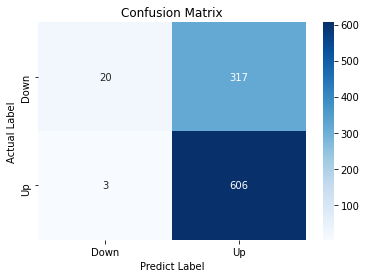

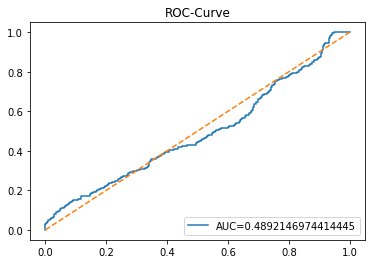

In [281]:
y_pred_7_b = tuned_model_7_b.predict(X_test_7)
plot_confusion_matrix(y_test_7, y_pred_7_b)
plt.show()

y_pred_prob_7_b = tuned_model_7_b.predict_proba(X_test_7)[:, 1]
plot_roc(y_test_7, y_pred_prob_7_b)
plt.show()

## model-7-lstm

In [283]:
clear_session()


start=time.time()


epochs=1
LSTM_units_7_lstm=220
num_features_7_lstm=X_train_7.shape[1]
dropout_rate=0.
recurrent_dropout=0.4
verbose=1

#hyperparameter
batch_size=[1] 

# hyperparameter
hyperparameter_7_lstm={'batch_size':batch_size}


clf_7_lstm=KerasClassifier(build_fn=create_shallow_lstm, 
                           epochs=epochs, 
                           LSTM_units=LSTM_units_7_lstm, 
                           num_samples=num_samples, 
                           look_back=look_back, 
                           num_features=num_features_7_lstm, 
                           dropout_rate=dropout_rate,
                           recurrent_dropout=recurrent_dropout,
                           verbose=verbose)
search_7_lstm=GridSearchCV(estimator=clf_7_lstm, 
                           param_grid=hyperparameter_7_lstm,  
                           n_jobs=1,  
                           cv=tscv, 
                           scoring=scoring_lstm, # accuracy
                           refit=True, 
                           return_train_score=False)

# Fit model
tuned_model_7_lstm=search_7_lstm.fit(X_train_7_lstm, y_train_7, shuffle=False, callbacks=[reset])

# print the results
print('accuracy:', tuned_model_7_lstm.best_score_)
print('Best Hyperparameters:')
print('epochs:', tuned_model_7_lstm.best_estimator_.get_params()['epochs'])
print('batch_size:', tuned_model_7_lstm.best_estimator_.get_params()['batch_size'])
print('dropout_rate:', tuned_model_7_lstm.best_estimator_.get_params()['dropout_rate'])
print('recurrent_dropout:', tuned_model_7_lstm.best_estimator_.get_params()['recurrent_dropout'])

end = time.time()
print('running time: {:.2f}s'.format(end - start))

Train on 947 samples
945/945 [==============================] - 0s 515us/sample
Train on 1892 samples
945/945 [==============================] - 1s 577us/sample
Train on 2837 samples
945/945 [==============================] - 1s 617us/sample
Train on 3782 samples
945/945 [==============================] - 1s 631us/sample
Train on 4727 samples
945/945 [==============================] - 1s 665us/sample
Train on 5672 samples
945/945 [==============================] - 1s 701us/sample
Train on 6617 samples
945/945 [==============================] - 1s 722us/sample
Train on 7562 samples
945/945 [==============================] - 1s 773us/sample
Train on 8507 samples
8507/8507 [==============================] - 27s 3ms/sample - loss: 0.6779 - acc: 0.6101
accuracy: 0.5287037037037037
Best Hyperparameters:
epochs: 1
batch_size: 1
dropout_rate: 0.0
recurrent_dropout: 0.4
running time: 150.62s


946/946 [==============================] - 1s 874us/sample
Accuracy: 0.6437632135306554
Precision: 0.6437632135306554
Recall: 1.0


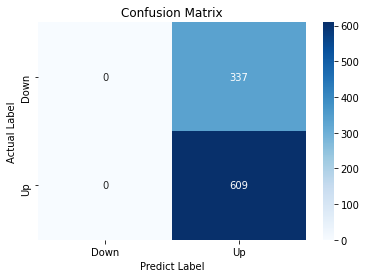

946/946 [==============================] - 1s 568us/sample


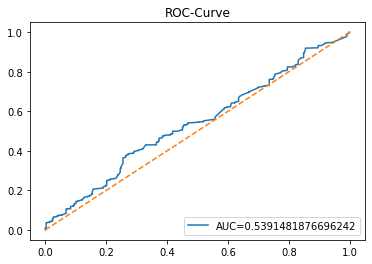

In [284]:
y_pred_7_lstm = tuned_model_7_lstm.predict(X_test_7_lstm)
plot_confusion_matrix(y_test_7, y_pred_7_lstm)
plt.show()

y_pred_prob_7_lstm = tuned_model_7_lstm.predict_proba(X_test_7_lstm)[:, 1]
plot_roc(y_test_7, y_pred_prob_7_lstm)
plt.show()